<a href="https://colab.research.google.com/github/SurabhiSharma-hub/Suru-puddle/blob/main/Mn_Soil_UMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''
#!ls /content
#!cp path/to/Zn UMS Soil (1).xlsx /content
#!chmod a+r /content/Zn UMS Soil (1).xlsx

#os.chdir("/content/path/to/Zn UMS Soil (1).xlsx")'''
import os
os.getcwd()
current_working_directory = os.getcwd()
print(f"Current working directory: {current_working_directory}")

# Change the current working directory to the directory containing the file
os.chdir("/content")
data= ("/content/Fe UMS Soil.xlsx")
# Read the file into a Pandas DataFrame
df = pd.read_excel('/content/Fe UMS Soil.xlsx')


df.info()
df.head()

Current working directory: /content
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 1802 entries, 2000 to Target_Fe
dtypes: float64(1802)
memory usage: 140.9 KB


,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,...,208,207,206,205,204,203,202,201,200,Target_Fe
0,0.400439,0.401404,0.401291,0.401983,0.402386,0.402889,0.403779,0.404065,0.404579,0.405145,...,0.954870,0.954300,0.946672,0.945854,0.940853,0.933477,0.929825,0.930702,0.921066,5.823302
1,0.347139,0.347411,0.347728,0.347873,0.348258,0.348606,0.349223,0.349149,0.349662,0.349874,...,0.944971,0.938072,0.935796,0.929918,0.925585,0.924220,0.921738,0.915174,0.908581,10.059996
2,0.300200,0.300634,0.301067,0.301068,0.301484,0.301974,0.302108,0.302267,0.302512,0.303037,...,0.918494,0.917347,0.913891,0.910287,0.903499,0.899306,0.898058,0.895738,0.893999,8.899384
3,0.354032,0.354566,0.354916,0.355857,0.356773,0.357041,0.358056,0.358457,0.359276,0.360291,...,0.943575,0.938831,0.935440,0.928596,0.924421,0.917423,0.915367,0.912125,0.902428,2.361184
4,0.287973,0.288632,0.289095,0.289036,0.289320,0.289367,0.290153,0.290275,0.290583,0.291188,...,0.916001,0.913607,0.905356,0.903718,0.901314,0.898582,0.894515,0.889066,0.882667,2.871248


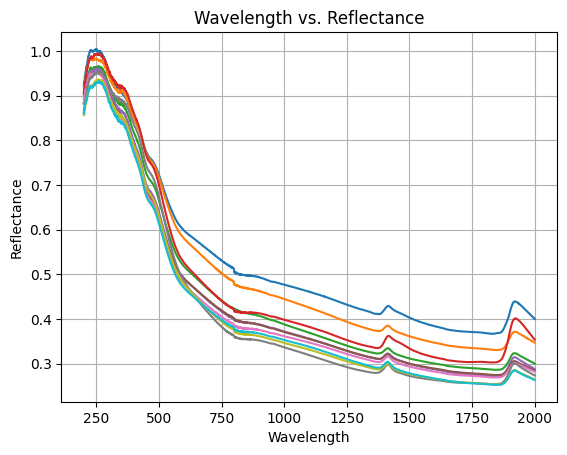

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_excel("/content/Fe UMS Soil.xlsx")

# Extract wavelength and reflectance columns
wavelength = data.columns[:-1] # Convert column names to strings and store in a list  # Assuming the last column is the target variable
#reflectance = data.iloc[:, :-1].values  # Exclude the target variable
reflectance = data.drop(columns="Target_Fe").values

# Plot wavelength vs. reflectance

for i in range(len(reflectance)):
   plt.plot(wavelength, reflectance[i])

plt.title("Wavelength vs. Reflectance")
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")

plt.grid(True)
plt.show()

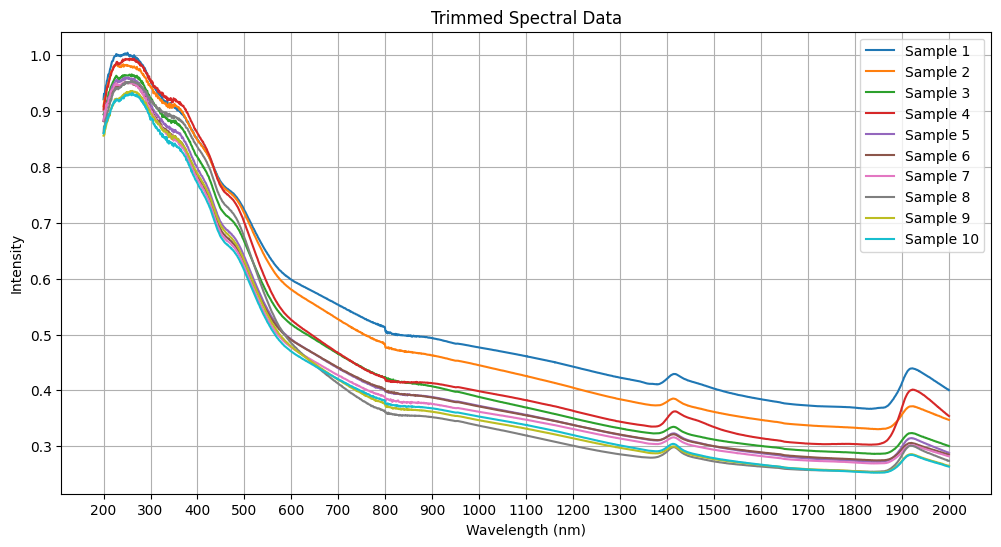

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing spectral data

# Define trimming range
start_wavelength = 200  # Start wavelength for trimming
end_wavelength = 2000   # End wavelength for trimming
gap = 100  # Gap between points

# Extract relevant wavelengths within the trimming range
trimmed_wavelengths = []
for w in df.columns:
    numeric_values = re.findall(r'\d+', str(w))  # Extracting numeric values
    if numeric_values:
        wavelength_value = float(numeric_values[0])
        if start_wavelength <= wavelength_value <= end_wavelength:
            trimmed_wavelengths.append(w)

# Trim the spectral data to include only the selected wavelengths
trimmed_spectral_data = df[trimmed_wavelengths].values

# Plot the trimmed spectral data
plt.figure(figsize=(12, 6))
for i in range(trimmed_spectral_data.shape[0]):
    plt.plot(trimmed_wavelengths, trimmed_spectral_data[i], label=f'Sample {i+1}')

# Adjust x-axis ticks to include a 50-point gap
plt.xticks(range(start_wavelength, end_wavelength + 1, gap))

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Trimmed Spectral Data')
plt.legend()
plt.grid(True)
plt.show()

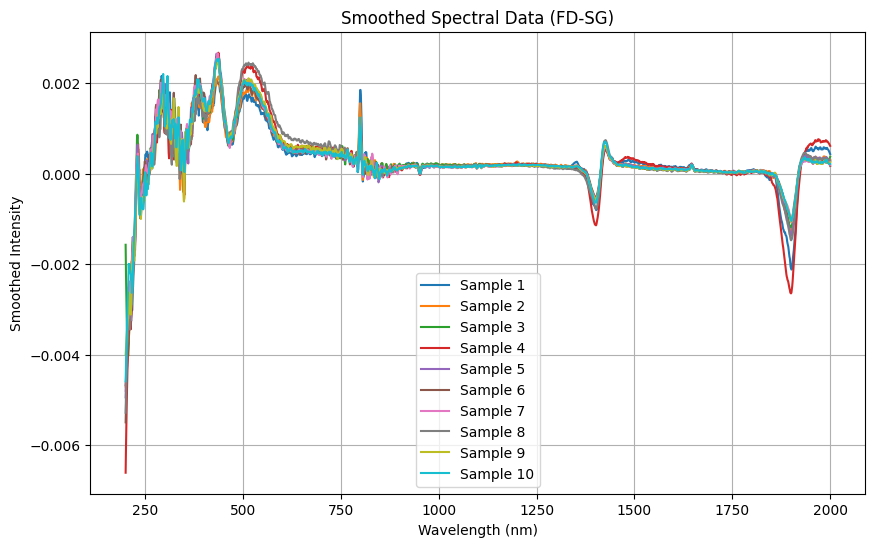

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


# Apply smoothing using First Derivative Savitzky-Golay filter
smoothed_spectral_data = savgol_filter(trimmed_spectral_data, window_length=15, polyorder=3, deriv=1)

# Plot the smoothed spectral data
plt.figure(figsize=(10, 6))
for i in range(smoothed_spectral_data.shape[0]):
    plt.plot(trimmed_wavelengths, smoothed_spectral_data[i], label=f'Sample {i+1}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Smoothed Intensity')
plt.title('Smoothed Spectral Data (FD-SG)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame containing the spectral data
# Each row is a sample and each column is a wavelength

def snv(input_data):
    """
    Apply Standard Normal Variate (SNV) transformation to spectral data.
    Args:
        input_data (numpy array): 2D array where each row is a spectrum.
    Returns:
        numpy array: SNV-transformed data.
    """
    # Mean center the data
    mean_centered = input_data - np.mean(input_data, axis=1, keepdims=True)
    # Divide by the standard deviation
    snv_data = mean_centered / np.std(mean_centered, axis=1, keepdims=True)
    return snv_data

# Example spectral data in a DataFrame
df = pd.read_excel('/content/Fe UMS Soil.xlsx')
'''df = pd.DataFrame({
    'Wavelength_1': [1, 2, 3, 4, 5],
    'Wavelength_2': [2, 3, 4, 5, 6],
    'Wavelength_3': [3, 4, 5, 6, 7],
    'Wavelength_4': [4, 5, 6, 7, 8],
    'Wavelength_5': [5, 6, 7, 8, 9]
'''

# Convert the DataFrame to a numpy array
spectral_data = df.values

# Apply SNV
snv_transformed_data = snv(spectral_data)

# Convert the SNV-transformed data back to a DataFrame
snv_df = pd.DataFrame(snv_transformed_data, columns=df.columns)

print("Original Data:")
print(df)
print("\nSNV Transformed Data:")
print(snv_df)


Original Data:
       2000      1999      1998      1997      1996      1995      1994  \
0  0.400439  0.401404  0.401291  0.401983  0.402386  0.402889  0.403779   
1  0.347139  0.347411  0.347728  0.347873  0.348258  0.348606  0.349223   
2  0.300200  0.300634  0.301067  0.301068  0.301484  0.301974  0.302108   
3  0.354032  0.354566  0.354916  0.355857  0.356773  0.357041  0.358056   
4  0.287973  0.288632  0.289095  0.289036  0.289320  0.289367  0.290153   
5  0.285047  0.285292  0.285466  0.285834  0.285883  0.285997  0.286546   
6  0.282013  0.282092  0.282397  0.282668  0.282816  0.283070  0.283374   
7  0.273808  0.273822  0.274167  0.274890  0.274505  0.275072  0.275771   
8  0.264884  0.265074  0.265527  0.265427  0.265706  0.266061  0.266369   
9  0.263447  0.263725  0.264120  0.264238  0.264357  0.264486  0.264908   

       1993      1992      1991  ...       208       207       206       205  \
0  0.404065  0.404579  0.405145  ...  0.954870  0.954300  0.946672  0.945854   

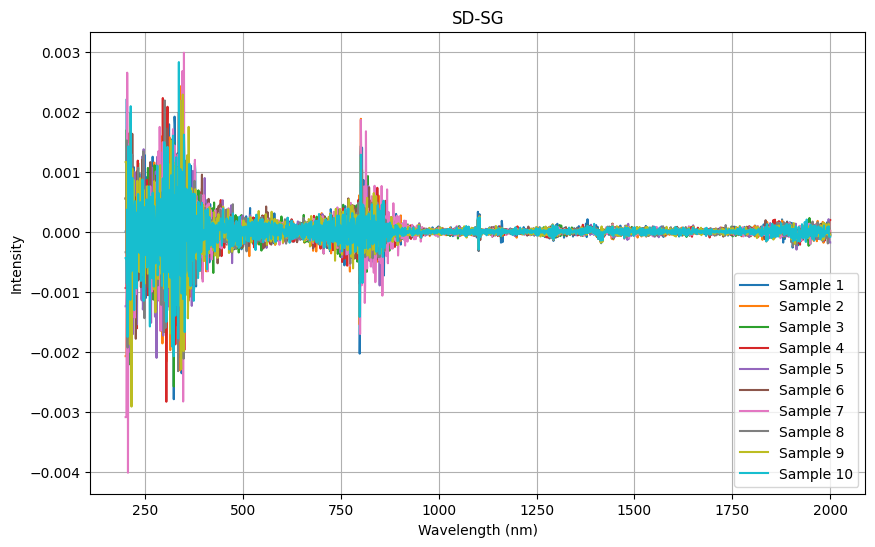

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


# Trim the spectral data to include only the selected wavelengths
# trimmed_spectral_data = df[trimmed_wavelengths]

# Apply Savitzky-Golay smoothing filter
window_size = 5  # Must be an odd number
polynomial_order = 2
smoothed_spectral_data = savgol_filter(trimmed_spectral_data, window_length=5, polyorder=2, deriv=2)

# Extract numeric parts from the column names for plotting
# numeric_trimmed_wavelengths = [int(re.findall(r'\d+', col)[0]) for col in trimmed_wavelengths]

# Plot the original and smoothed spectral data
plt.figure(figsize=(10, 6))
for i in range(trimmed_spectral_data.shape[0]):
    #plt.plot(numeric_trimmed_wavelengths, trimmed_spectral_data.iloc[i], label=f'Original Sample {i+1}')
    plt.plot(trimmed_wavelengths, smoothed_spectral_data[i], label=f'Sample {i+1}')

# Adjust x-axis ticks to include a specified gap
#plt.xticks(range(start_wavelength, end_wavelength + 1, gap))

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('SD-SG')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


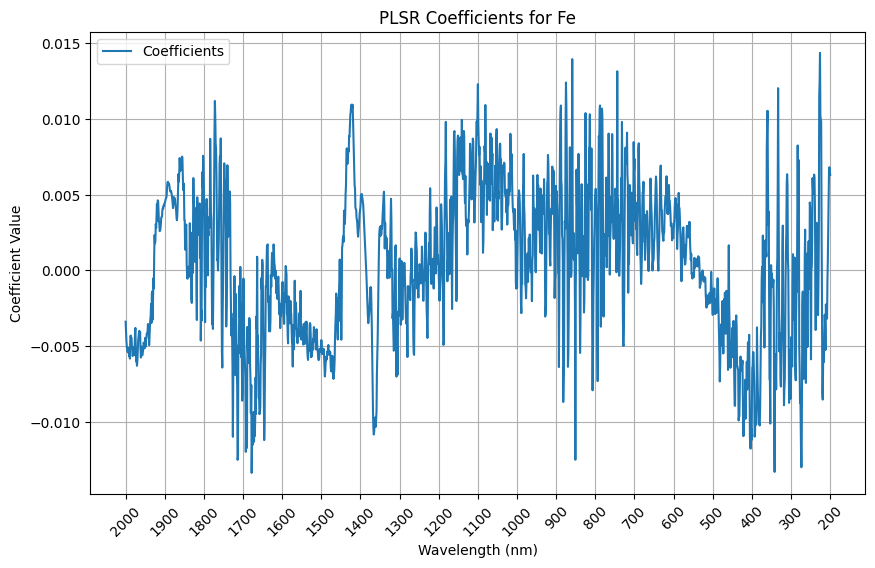

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

# Assuming trimmed_wavelengths is your x-axis data
x = np.arange(len(trimmed_wavelengths))

# Adjusting x-axis to have 100 points gap
x_sparse = x[::100]

# Extract the target variable from the last column of the df DataFrame
target_variable = df.iloc[:, -1].values

# Train a PLSR model using the smoothed spectral data and the target variable
pls = PLSRegression(n_components=2)  # You can adjust the number of components
pls.fit(smoothed_spectral_data, target_variable)

# Retrieve the regression coefficients from the PLSR model
coefficients = pls.coef_

plt.figure(figsize=(10, 6))
plt.plot(x, coefficients, label='Coefficients')
plt.xticks(x_sparse, trimmed_wavelengths[::100], rotation=45)  # Set x-axis ticks and labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Coefficient Value')
plt.title('PLSR Coefficients for Fe')
plt.grid(True)
plt.legend()
plt.show()

                    Unnamed: 0.1  Unnamed: 0      2000      1999      1998  \
Mean                         NaN         NaN  0.508635  0.516473  0.505819   
Max                          NaN         NaN  1.297854  1.288697  1.298199   
Min                          NaN         NaN -0.294837 -0.282600 -0.296412   
Standard Deviation           NaN         NaN  0.473484  0.474665  0.472003   
Variance                     NaN         NaN  0.224187  0.225307  0.222787   
Median                       NaN         NaN  0.334496  0.333160  0.334530   
Range                        NaN         NaN  1.592691  1.571297  1.594610   
Skewness                     NaN         NaN  0.049756  0.029780  0.058196   
Kurtosis                     NaN         NaN -0.974604 -1.068733 -0.946013   

                        1997      1996      1995      1994      1993  ...  \
Mean                0.507168  0.492563  0.495947  0.494715  0.498028  ...   
Max                 1.298731  1.313075  1.309913  1.312155  1.310

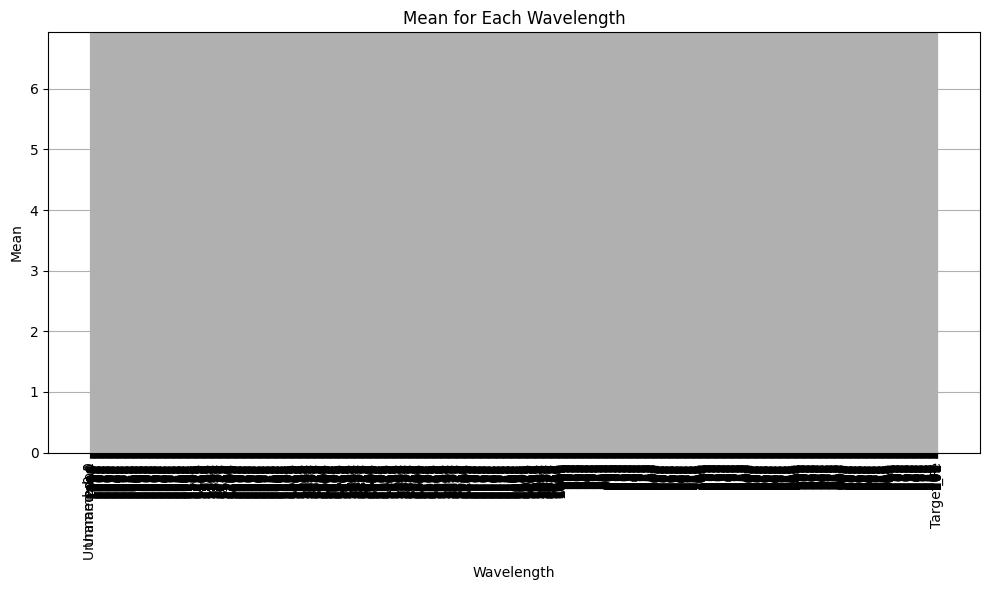

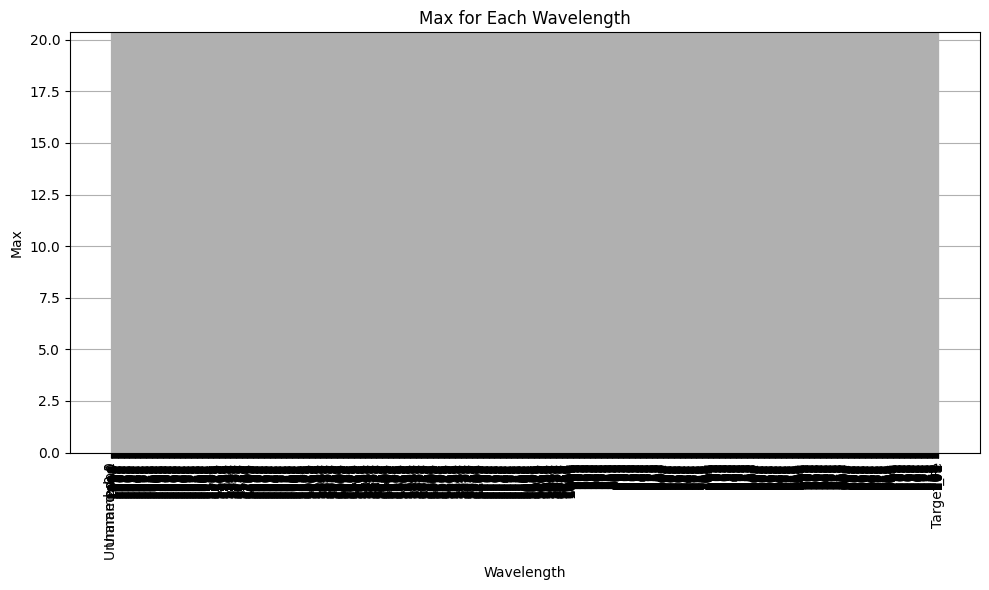

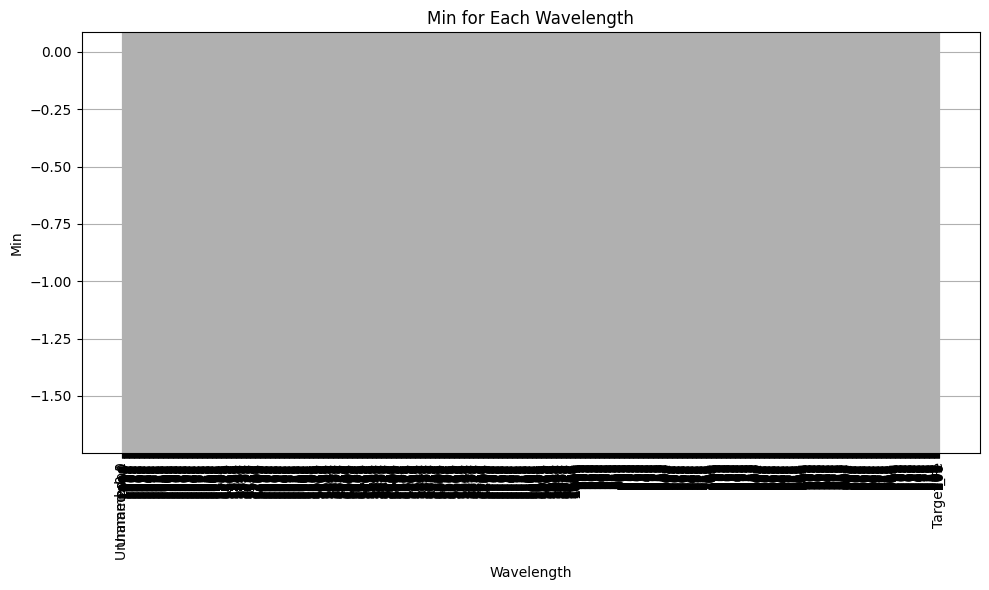

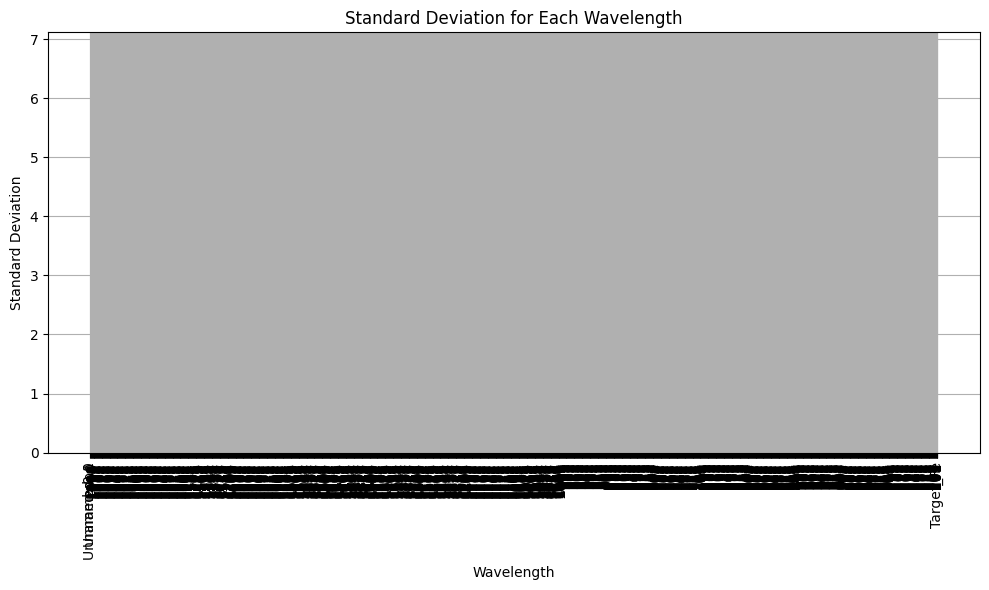

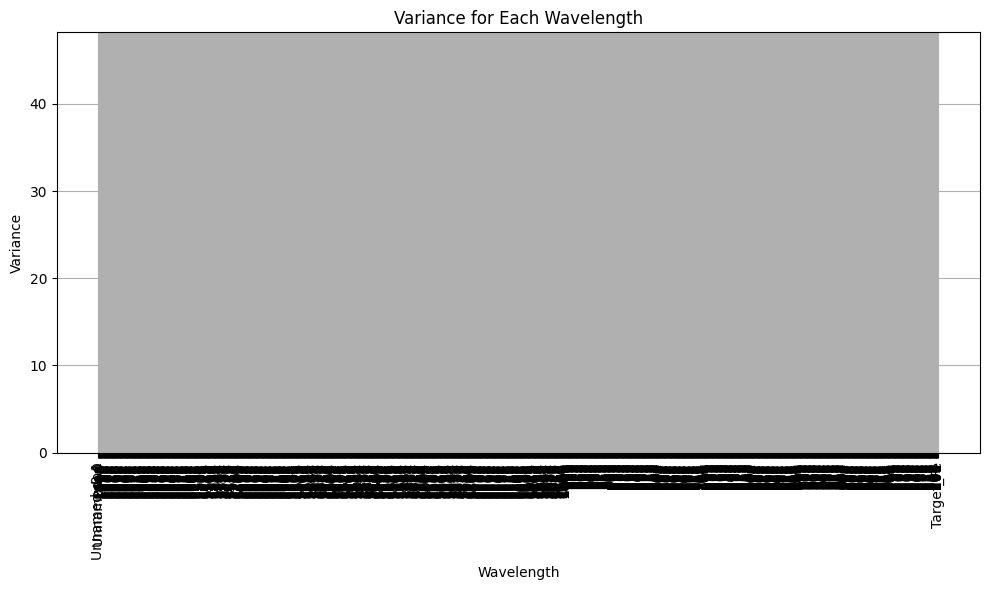

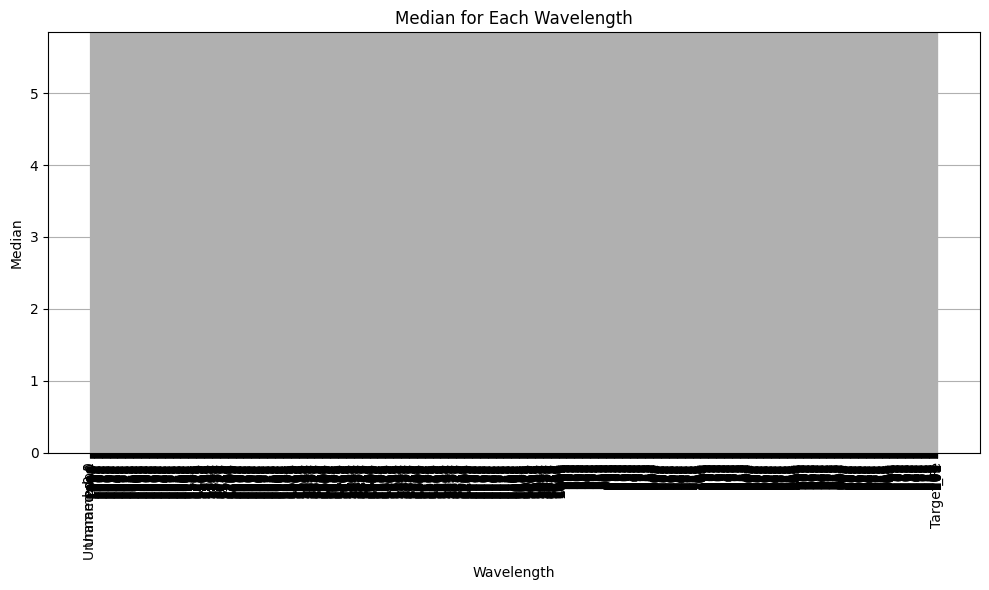

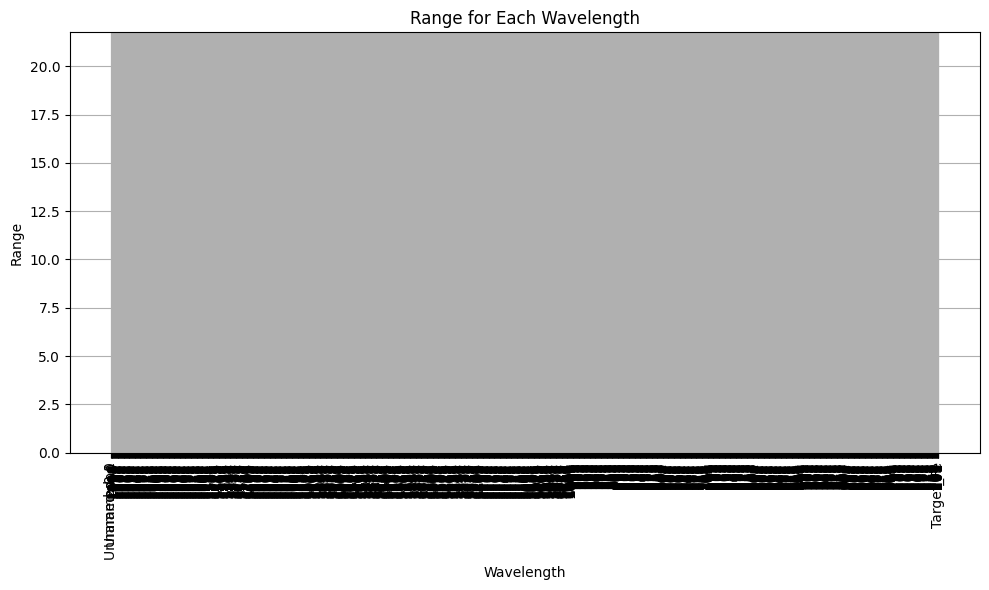

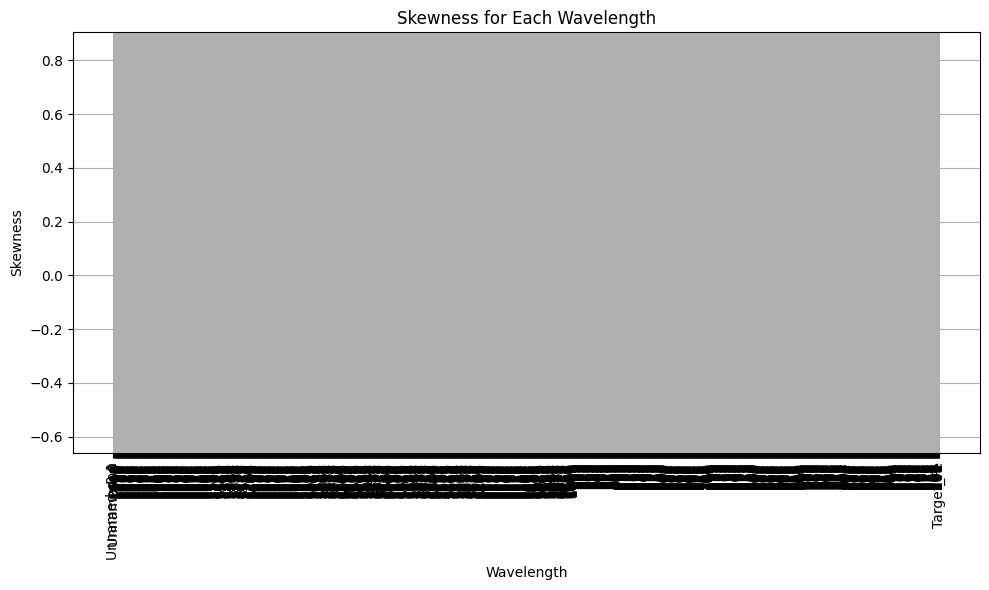

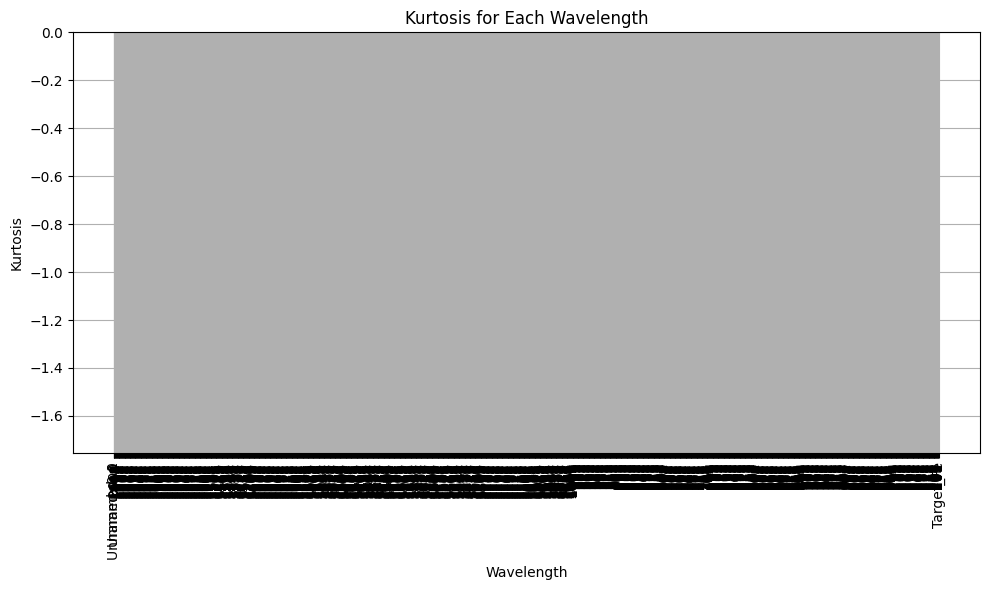

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# Load your soil spectral data into a pandas DataFrame
# Assuming 'soil_data.csv' is your file with spectral data
# Replace 'soil_data.csv' with your actual file name
df = pd.read_excel('/content/Fe UMS Soil.xlsx')
df = df.apply(pd.to_numeric, errors='coerce')
# Calculate statistical measures for each column
statistics = {}

for column in df.columns:
    data = df[column]
    statistics[column] = {
        'Mean': np.mean(data),
        'Max': np.max(data),
        'Min': np.min(data),
        'Standard Deviation': np.std(data),
        'Variance': np.var(data),
        'Median': np.median(data),
        'Range': np.ptp(data),
        'Skewness': skew(data),
        'Kurtosis': kurtosis(data)
    }

# Convert the dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame(statistics)
print(stats_df)

# Optionally, save the statistics to a Excel file
stats_df.to_excel('/content/Fe UMS Soil.xlsx')

# Plotting the statistics
stats_to_plot = ['Mean', 'Max', 'Min', 'Standard Deviation', 'Variance', 'Median', 'Range', 'Skewness', 'Kurtosis']

for stat in stats_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(stats_df.columns.astype(str), stats_df.loc[stat])
    plt.title(f'{stat} for Each Wavelength')
    plt.xlabel('Wavelength')
    plt.ylabel(stat)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


R² and RMSE:
Train R²: 0.1740
Test R²: -2.1452
Train RMSE: 2.9384
Test RMSE: 2.9150


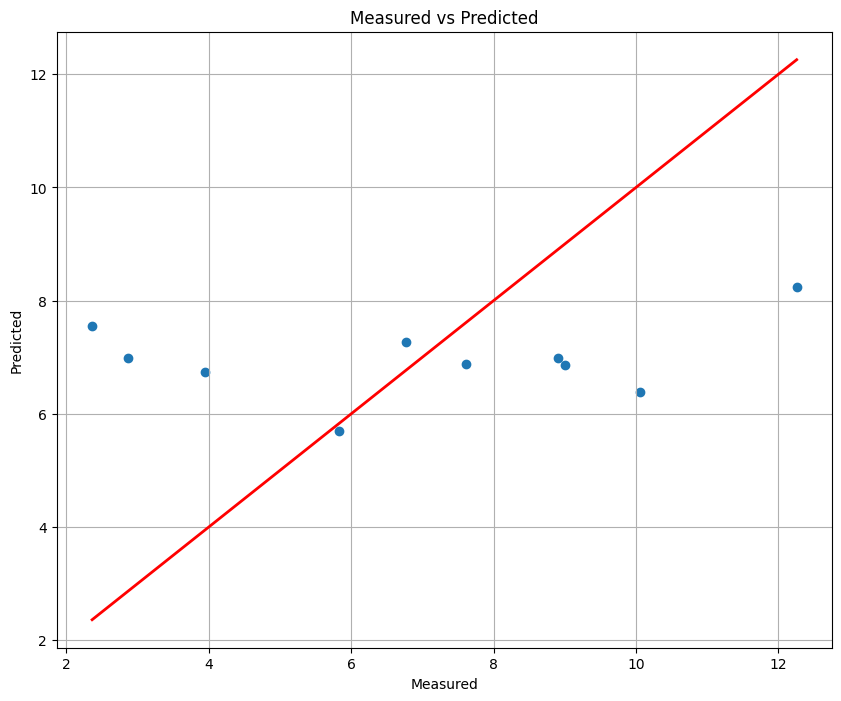

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Read the file into a Pandas DataFrame
df = pd.read_excel('/content/Fe UMS Soil.xlsx')
# Assume the last column is the target variable
target = df.iloc[:, -1].values
# Data without the target variable
data = df.iloc[:, :-1].values

# Separate features (X) and target (y)
X = df.drop(columns=['Target_Fe'])
y = df['Target_Fe']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Fit a regression model
regressor = LinearRegression()
regressor.fit(principal_components, target)

# Predict the target using the regression model
target_pred = regressor.predict(principal_components)

# Calculate R² and RMSE
#r2 = r2_score(target, target_pred)
#rmse = np.sqrt(mean_squared_error(target, target_pred))
# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

#print(f"Training MSE: {train_mse}")
#print(f"Testing MSE: {test_mse}")
#print(f"Training R2: {train_r2}")
#print(f"Testing R2: {test_r2}")

# Print R² and RMSE
print("R² and RMSE:")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train RMSE: {np.sqrt(train_mse):.4f}")
print(f"Test RMSE: {np.sqrt(test_mse):.4f}")

#print("R²:", r2)
#print("RMSE:", rmse)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(target, target_pred)
plt.plot([min(target), max(target)], [min(target), max(target)], color='red', linewidth=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted')
plt.grid(True)
plt.show()


Training MSE: 8.634470978665131
Testing MSE: 8.497444740327358
Training R2: 0.17402878666144705
Testing R2: -2.1452248166317647


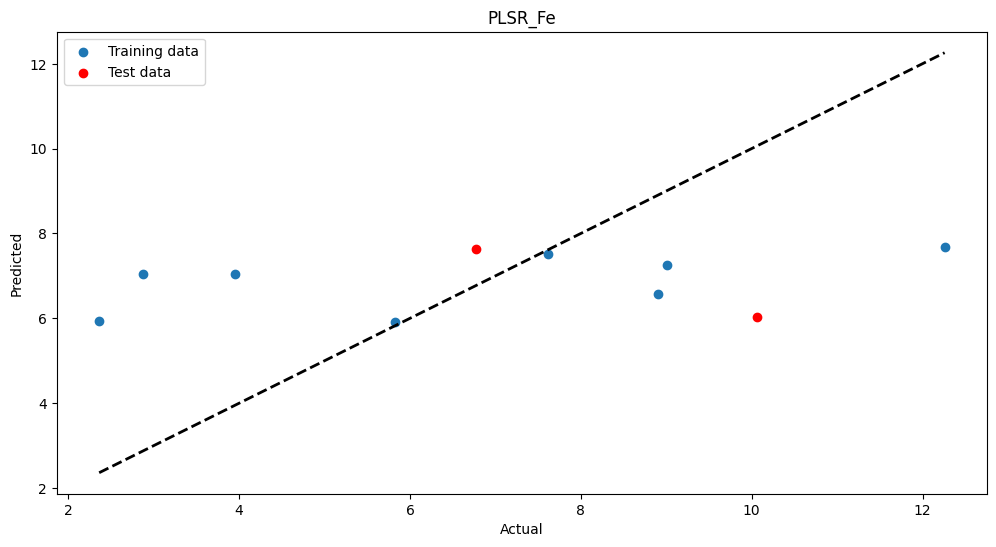

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Sample DataFrame for demonstration (replace this with your actual DataFrame)

df = pd.read_excel("/content/Fe UMS Soil.xlsx")

# Separate features (X) and target (y)
X = df.drop(columns=['Target_Fe'])
y = df['Target_Fe']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf')  # You can also try other kernels like 'linear' or 'poly'
svr.fit(X_train_scaled, y_train)


# Make predictions
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2: {train_r2}")
print(f"Testing R2: {test_r2}")


# Plot actual vs predicted values for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, label='Training data')
plt.scatter(y_test, y_test_pred, label='Test data', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('PLSR_Fe')
plt.legend()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!pip install seaborn
%matplotlib inline


In [ ]:
import os
os.getcwd()
current_working_directory = os.getcwd()
print(f"Current working directory: {current_working_directory}")

# Change the current working directory to the directory containing the file
os.chdir("/content")
data= ("/content/Fe UMS Soil.xlsx")
# Read the file into a Pandas DataFrame
df = pd.read_excel('/content/Fe UMS Soil.xlsx')


df.info()
df.head()



Current working directory: /content
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 1802 entries, 2000 to Target_Fe
dtypes: float64(1802)
memory usage: 140.9 KB


,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,...,208,207,206,205,204,203,202,201,200,Target_Fe
0,0.400439,0.401404,0.401291,0.401983,0.402386,0.402889,0.403779,0.404065,0.404579,0.405145,...,0.954870,0.954300,0.946672,0.945854,0.940853,0.933477,0.929825,0.930702,0.921066,5.823302
1,0.347139,0.347411,0.347728,0.347873,0.348258,0.348606,0.349223,0.349149,0.349662,0.349874,...,0.944971,0.938072,0.935796,0.929918,0.925585,0.924220,0.921738,0.915174,0.908581,10.059996
2,0.300200,0.300634,0.301067,0.301068,0.301484,0.301974,0.302108,0.302267,0.302512,0.303037,...,0.918494,0.917347,0.913891,0.910287,0.903499,0.899306,0.898058,0.895738,0.893999,8.899384
3,0.354032,0.354566,0.354916,0.355857,0.356773,0.357041,0.358056,0.358457,0.359276,0.360291,...,0.943575,0.938831,0.935440,0.928596,0.924421,0.917423,0.915367,0.912125,0.902428,2.361184
4,0.287973,0.288632,0.289095,0.289036,0.289320,0.289367,0.290153,0.290275,0.290583,0.291188,...,0.916001,0.913607,0.905356,0.903718,0.901314,0.898582,0.894515,0.889066,0.882667,2.871248


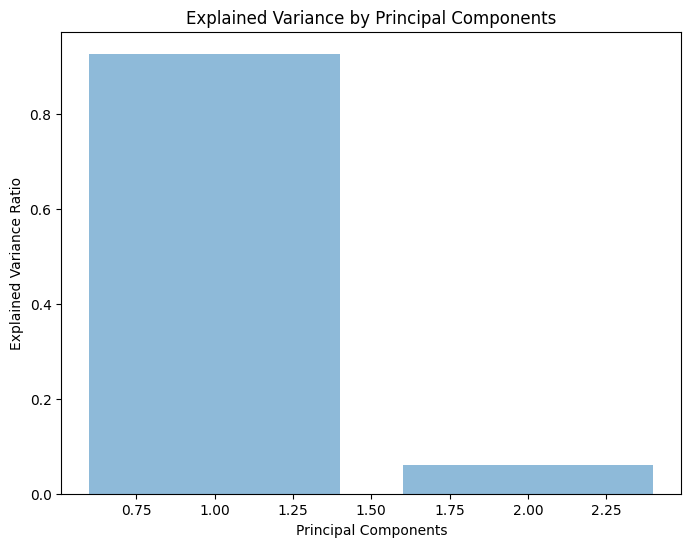

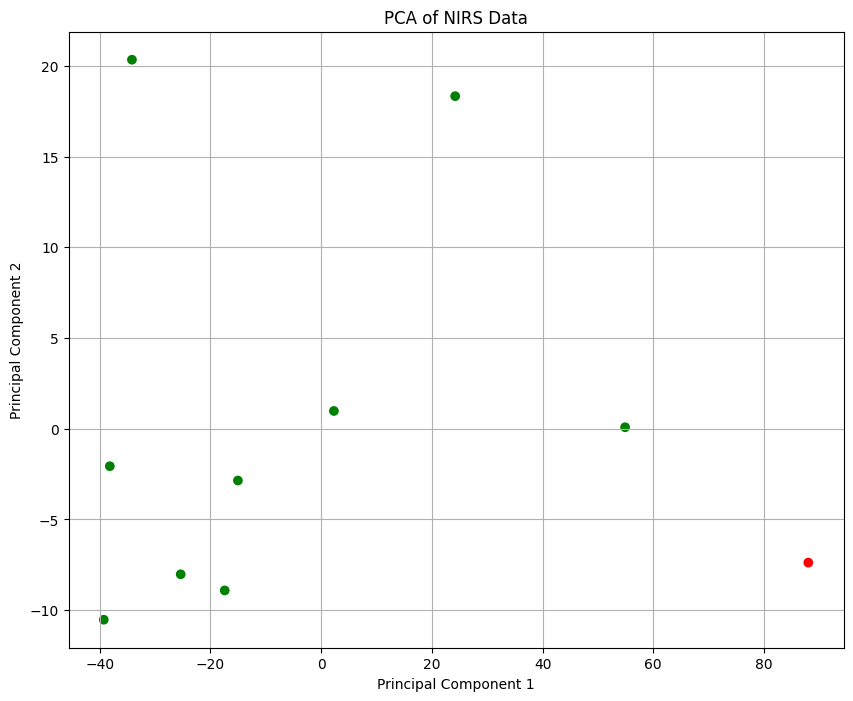

Explained variance ratio: [0.92621849 0.05949653]
Loadings:
[[ 0.02389306  0.0238917   0.02389096 ...  0.02307404  0.02302157
  -0.00339901]
 [ 0.01053412  0.01038722  0.01050622 ...  0.0090244  -0.00133389
   0.01506821]]


In [ ]:
#PCA Visualisation

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#data= ("/content/Fe UMS Soil.xlsx")
# Read the file into a Pandas DataFrame
df = pd.read_excel('/content/Fe UMS Soil.xlsx')
data=df.values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

colors=['red' if i==0 else 'green' for i in range(len(pca_df))]
# Plot the principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'],c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of NIRS Data')
plt.grid(True)
plt.show()

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the loadings (coefficients)
loadings = pca.components_
print("Loadings:")
print(loadings)




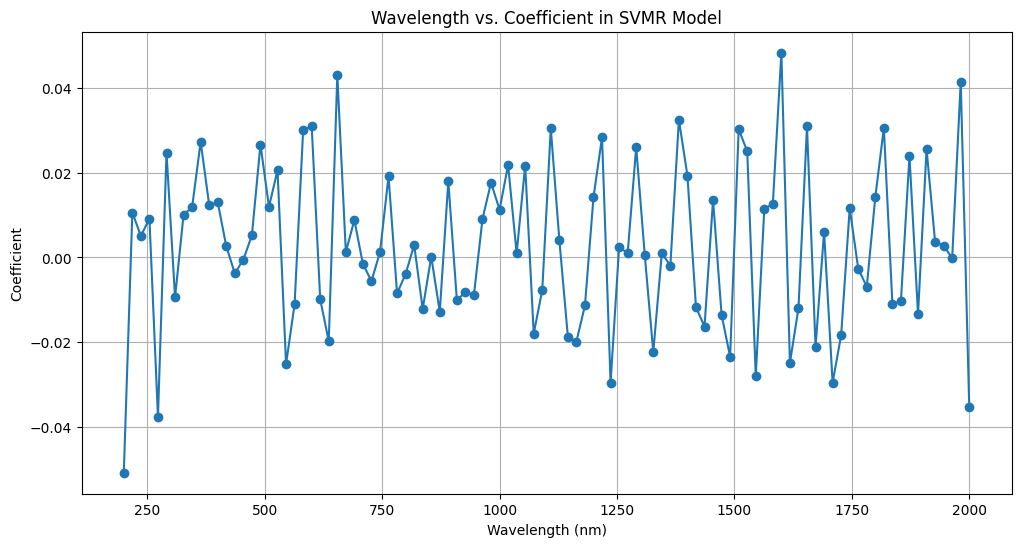

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Example data: replace this with your actual spectral data
# Assume wavelengths are in columns and the target variable (element concentration) is in the last column
# For example: data = pd.read_csv('spectral_data.csv')
# Spectral data (wavelengths) should be in columns 0 to -2, and the target variable in the last column

# Generating a dummy dataset for demonstration
np.random.seed(0)
wavelengths = np.linspace(200, 2000, 100)  # 100 wavelengths from 400nm to 700nm
#df = pd.read_excel('/content/Fe UMS Soil.xlsx')
data = pd.DataFrame(np.random.random((50,101)), columns=[f'wl_{int(wl)}' for wl in wavelengths] + ['target'])
df=pd.read_excel('/content/Zn UMS Soil.xlsx')



# Separate features (wavelengths) and target variable (element concentration)
X = data.iloc[:, :-1]  # all columns except the last one
y = data.iloc[:, -1]   # the last column

# Initialize and train the SVMR model
svr = make_pipeline(StandardScaler(), SVR(kernel='linear'))
svr.fit(X, y)

# Extract the coefficients from the trained model
# Note: SVR with a linear kernel has coefficients in the 'coef_' attribute
coefficients = svr.named_steps['svr'].coef_

# Plot the wavelengths vs. coefficients
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, coefficients.ravel(), marker='o')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Coefficient')
plt.title('Wavelength vs. Coefficient in SVMR Model')
plt.grid(True)
plt.show()


In [ ]:
def calculate_vip(X, y, model):
    # X scores
    XS = model.x_scores_
    # X weights
    W0 = model.x_weights_
    # Y loadings
    yl = model.y_loadings_
    # Number of predictor variables
    p = XS.shape[1]
    # Calculate sum of squares
    sumSq = np.sum(XS**2, axis=0) * np.sum(yl**2, axis=0)
    # Calculate VIP scores
    vipScore = np.sqrt(p * np.sum(sumSq * (W0**2), axis=1) / np.sum(sumSq))
    return vipScore
print('vipScore')

vipScore


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Read the spectral data from an Excel file
df = pd.read_excel('/content/Zn UMS Soil.xlsx')
print(df.columns)
# Extract wavelengths from 200 nm to 2000 nm
wavelengths = [col for col in df.columns if col.startswith('wl_')and 200 <= int(col.split('_')[1]) <= 2000]

# Ensure the target variable column name is known (replace 'target' with the actual column name if different)
target_column = 'target_Zn'  # Change this if your target variable has a different column name

# Separate features (wavelengths) and target variable (element concentration)
X = df[wavelengths].values
y = df[target_column].values

# Initialize and train the SVMR model
svr = make_pipeline(StandardScaler(), SVR(kernel='linear'))
svr.fit(X, y)

# Extract the coefficients from the trained model
# Note: SVR with a linear kernel has coefficients in the 'coef_' attribute
coefficients = svr.named_steps['svr'].coef_

# Convert wavelength column names back to numeric values for plotting
wavelengths_numeric = [int(col.split('_')[1]) for col in wavelengths]

# Plot the wavelengths vs. coefficients
plt.figure(figsize=(12, 6))
plt.plot(wavelengths_numeric, coefficients.ravel(), marker='o')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Coefficient')
plt.title('Wavelength vs. Coefficient in SVMR Model')
plt.grid(True)
plt.show()


Index([       2000,        1999,        1998,        1997,        1996,
              1995,        1994,        1993,        1992,        1991,
       ...
               208,         207,         206,         205,         204,
               203,         202,         201,         200, 'Target_Zn'],
      dtype='object', length=1802)


AttributeError: 'int' object has no attribute 'startswith'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
measured_oc = np.array([...])  # Replace with your actual data
predicted_oc = np.array([...])  # Replace with your actual data

# Create scatter plot
plt.scatter(measured_oc, predicted_oc, color='red')

# Calculate line of best fit
a, b = np.polyfit(measured_oc, predicted_oc, 1)

# Add line of best fit to plot
plt.plot(measured_oc, a*measured_oc+b, color='blue')

# Label axes
plt.xlabel('Measured OC (%)')
plt.ylabel('Predicted OC (%)')
plt.title('Measured vs. Predicted OC')

# Show plot
plt.show()
